# Statistics Homework #1
#### Jason Chou

In [45]:
%%capture
from __future__ import division
import numpy as np
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm
import glob
import ldac
import scipy.optimize as opt
import scipy.stats as stats
import pyfits
from fitmodel import *

%load_ext autoreload
%autoreload 2

% matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20

---
## 1. Archival Observations of a Star
_**Background**: Observations of a star on a daily basis. We want to determine if the star is a variable star and discuss the statistics_

filepath of the data

In [2]:
archpath = '/afs/ir.stanford.edu/class/physics100/workdir/g2/Jason/statsHW/prob1.cat'

read in

In [10]:
archdata = pyfits.open(archpath)

## apparently the data were stored in the second index...
ardat = archdata[1].data
arhdr = archdata[1].header

what's the structure?

In [20]:
print 'data'
print '-'*80
print ardat
print '\n'+'+-'*40
print 'header'
print '-'*80
print arhdr

data
--------------------------------------------------------------------------------
[( 1,  19934.92382812,  143.21434021) ( 2,  19985.03125   ,  133.70014954)
 ( 3,  20044.58789062,  129.98512268) ( 4,  19949.6953125 ,  155.73512268)
 ( 5,  19913.63867188,  133.89277649) ( 6,  19703.3203125 ,  134.13404846)
 ( 7,  20024.49414062,  171.88423157) ( 8,  20150.86328125,  140.15966797)
 ( 9,  19718.79296875,  129.11813354) (10,  19877.3828125 ,  152.820755  )
 (11,  20016.6328125 ,  142.05625916) (12,  19847.33203125,  127.97586823)
 (13,  20146.81640625,  123.5333786 ) (14,  19602.92773438,  151.1676178 )
 (15,  20138.02539062,  134.80491638) (16,  20008.6484375 ,  146.69168091)
 (17,  19996.36914062,  145.43486023) (18,  19887.84765625,  145.45933533)
 (19,  19827.92382812,  150.11022949) (20,  20116.99023438,  125.50985718)
 (21,  19961.58203125,  124.30753326) (22,  19948.04882812,  131.40472412)
 (23,  19899.95507812,  158.40997314) (24,  20004.86328125,  143.61758423)
 (25,  20022.3

---
So the first column is index (`Obs`), the second is flux (`flux`), and the third the error in flux (`fluxerr`).

In [53]:
idx     = ardat['Obs']
flux    = ardat['flux']
fluxerr = ardat['fluxerr']

nbrofobs = idx[-1]

### Quantities

In [54]:
unw_mean  = np.mean(flux)
median    = np.median(flux)
unwmn_err = np.sqrt(np.sum(fluxerr**2))/nbrofobs
unwmn_var = unwmn_err**2
wei_mean  = np.average(flux,weights=fluxerr**-2,axis=0)
weimn_err = np.sqrt(np.sum(fluxerr**-2, axis=0)**-1)
weimn_var = weimn_err**2

print '(a) Unweighted mean : {0:.2f}'.format(unw_mean)
print '(b) Median          : {0:.2f}'.format(median)
print '(c) Error    of (a) : {0:.2f}'.format(unwmn_err)
print '(d) Variance of (a) : {0:.2f}'.format(unwmn_var)
print '(e) Weighted mean   : {0:.2f}'.format(wei_mean)
print '(f) Eror     of (e) : {0:.2f}'.format(weimn_err)
print '(g) Variance of (e) : {0:.2f}'.format(weimn_var)

(a) Unweighted mean : 19951.47
(b) Median          : 19973.31
(c) Error    of (a) : 25.49
(d) Variance of (a) : 649.95
(e) Weighted mean   : 19954.50
(f) Eror     of (e) : 25.15
(g) Variance of (e) : 632.46


---
## 2. Modelling Previous Observations
### (a) Flux - histogram and light curve

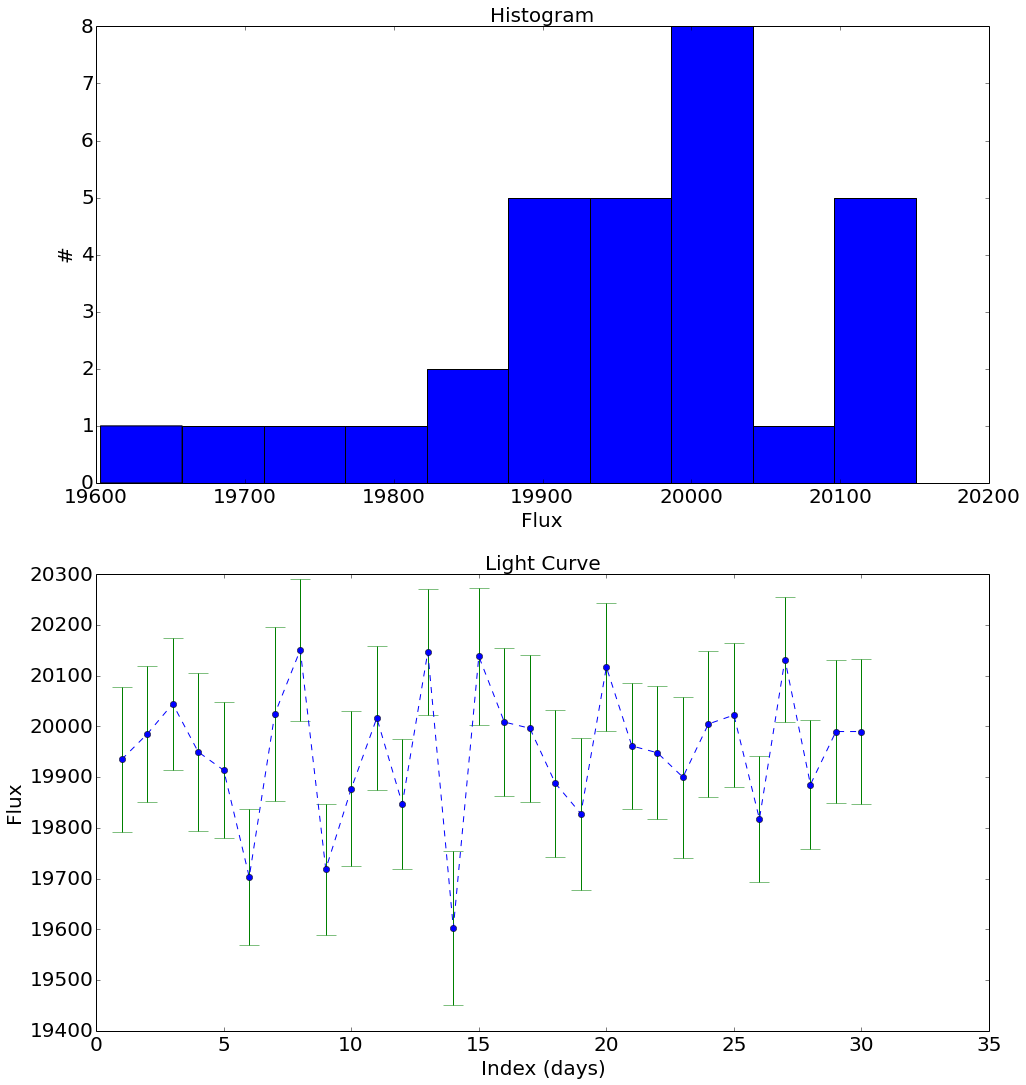

In [84]:
plt.figure(figsize=(16,18))
plt.subplot(211); plt.hist(flux, bins=10);
plt.xlabel("Flux"); plt.ylabel("#"); plt.title('Histogram')

plt.subplot(212); plt.errorbar(idx,flux,yerr=fluxerr,fmt='o--',ecolor='g',capsize=10)
plt.xlabel('Index (days)'); plt.ylabel('Flux'); plt.title('Light Curve')

### (b) Flux - Fitting with constant

In [46]:
fit = FitModel(idx,flux,fluxerr,ConstantModel)
fit.fit()

fval = 27.4378, nfcn 13
fval = 27.4378, nfcn 13
Fit parameters : 
{'a0': 19954.50461799189}


#### Quantities

In [67]:
## (i)
chisq = fit.statval

## (ii)
dof = nbrofobs - 1
prob_high = chisq_exceeds_prob(chisq,dof)

## (iv)
best_const = fit.par_vals['a0']
#- 68%
fit.uncert(nsigma=1.0)
conf68_low,conf68_high = fit.par_err['a0']
#- 95%
fit.uncert(nsigma=2.0)
conf95_low,conf95_high = fit.par_err['a0']

Hesse errors : 
{'a0': 25.148767248671867}
Parameter errors :
{'a0': (-25.148767249461066, 25.148767249490103)}
Hesse errors : 
{'a0': 25.14876724888287}
Parameter errors :
{'a0': (-50.29753450076498, 50.297534500803735)}


Since the low/high confidence limits are roughly the same, we can say

In [83]:
print '   (i) Best fit chi-square    : {0:.2f}'.format(chisq)
print '  (ii) Probility being random : {0:.2f}'.format(prob_high)
print ' (iii) Is this fit acceptable?: YES'
print '  (iv) Best-fit value (68%)   : {0:.2f} +/- {1:.2f}'.format(best_const,conf68_high)
print '  (iv) Best-fit value (95%)   : {0:.2f} +/- {1:.2f}'.format(best_const,conf95_high)

   (i) Best fit chi-square    : 27.44
  (ii) Probility being random : 0.55
 (iii) Is this fit acceptable?: YES
  (iv) Best-fit value (68%)   : 19954.50 +/- 25.15
  (iv) Best-fit value (95%)   : 19954.50 +/- 50.30


#### <p style="text-indent: 20px"> (v) Consistency of fit versus data

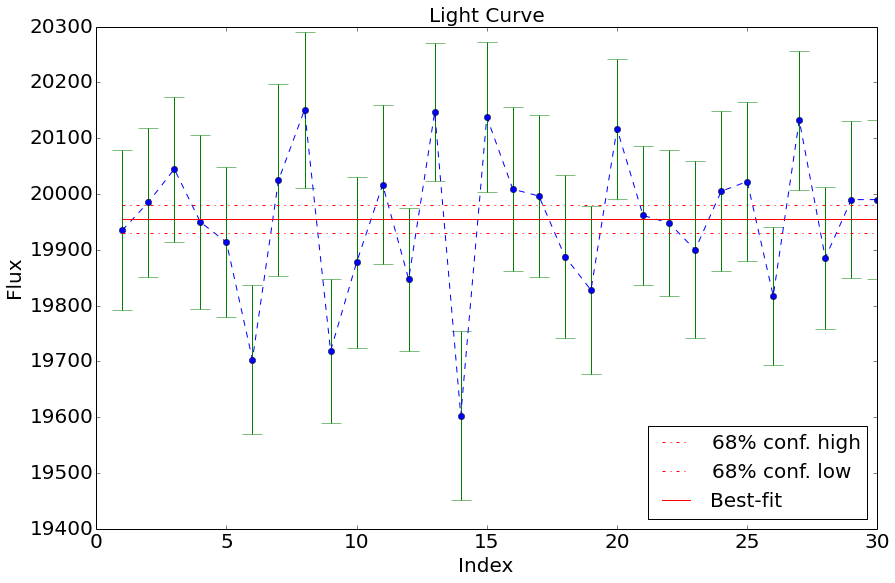

In [80]:
plt.figure(figsize=(14,9))
plt.errorbar(idx,flux,yerr=fluxerr,fmt='o--',ecolor='g',capsize=10)
plt.plot([1,nbrofobs],[best_const+conf68_high,best_const+conf68_high],'r-.',label='68% conf. high')
plt.plot([1,nbrofobs],[best_const+conf68_low, best_const+conf68_low] ,'r-.',label='68% conf. low')
plt.plot([1,nbrofobs],[best_const,best_const],'r',label='Best-fit')
plt.xlabel('Index'); plt.ylabel('Flux'); plt.title('Light Curve')
plt.legend(loc='lower right')

So most of the data points lie within the 68% confidence region.

### (c) How does the best-fit constant compare to crude statistics?
It is closest to the "weighted mean", which presumably takes into account the error in each data point. This makes sense and indeed the confidence limit matches with the estimated error (std) as well.

---
## 3. Follow-up Observations of Your Star
_**Background**: We acquired new measurements of the same star but some bad events occurred during the observations, which were flagged in the extra columns. Now we want to examine the shorter-period (hourly basis) behavior of the star._

Data again

In [85]:
arch2path = '/afs/ir.stanford.edu/class/physics100/workdir/g2/Jason/statsHW/prob3.cat'
arch2data = pyfits.open(arch2path)

ar2dat = arch2data[1].data
ar2hdr = arch2data[1].header

print 'data'
print '-'*80
print ar2dat
print '\n'+'+-'*40
print 'header'
print '-'*80
print ar2hdr

data
--------------------------------------------------------------------------------
[( 1,  19982.25976562,  172.32226562, 0, 0)
 ( 2,  20609.13476562,  100.82170868, 1, 0)
 ( 3,  20009.83007812,  130.17703247, 0, 0)
 ( 4,  17943.97070312,  126.25125885, 1, 0)
 ( 5,  20234.32617188,  131.75033569, 0, 0)
 ( 6,  19763.90820312,   86.1938858 , 0, 0)
 ( 7,  20111.87304688,  118.19112396, 0, 0)
 ( 8,  23179.0390625 ,  196.90979004, 1, 1)
 ( 9,  20364.12695312,  124.14914703, 0, 0)
 (10,  20431.00195312,  175.12004089, 0, 0)
 (11,  20089.        ,  133.35482788, 0, 0)
 (12,  20120.81640625,  125.93624878, 0, 0)
 (13,  20195.28125   ,  177.06370544, 0, 0)
 (14,  20441.48046875,  153.75135803, 0, 0)
 (15,  20236.06835938,  120.6158371 , 0, 0)
 (16,  24159.51171875,  101.01843262, 1, 0)
 (17,  20715.0625    ,  207.56411743, 1, 0)
 (18,  20488.46679688,  164.42152405, 0, 0)
 (19,  20093.41992188,  146.74269104, 0, 0)
 (20,  20398.859375  ,  168.94770813, 0, 0)
 (21,  20385.13476562,  138.791488

### (a) Light curve

In [86]:
idx2     = ar2dat['Obs']
flux2    = ar2dat['flux']
fluxerr2 = ar2dat['fluxerr']

nbrofobs2 = idx2[-1]

Record the flagged points

In [98]:
flagged = np.where(np.logical_or(ar2dat['plane']==1,ar2dat['guard']==1))
idx_flagged = idx2[flagged]
fluxflagged = flux2[flagged]

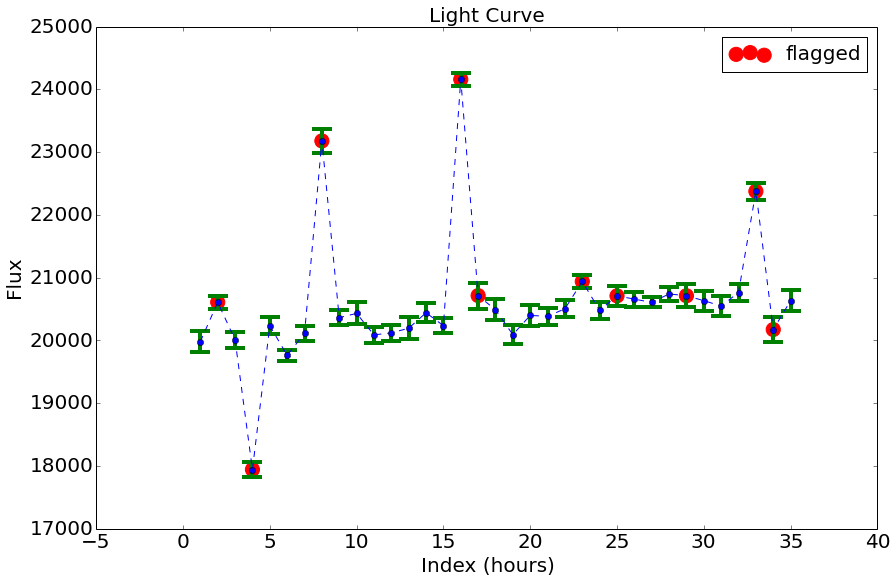

In [106]:
plt.figure(figsize=(14,9))
plt.errorbar(idx2,flux2,yerr=fluxerr2,fmt='o--',ecolor='g',capsize=10,capthick=4,elinewidth=4)
plt.scatter(idx_flagged,fluxflagged,color='r',s=200,label='flagged')
plt.xlabel('Index (hours)'); plt.ylabel('Flux'); plt.title('Light Curve')
plt.legend()

OK, clearly some bad data points, and all the "outliers" (determined by eye) are flagged. They can be removed. BTW, the "probability of being random" is:

In [107]:
%%capture
fit2 = FitModel(idx2,flux2,fluxerr2,ConstantModel)
fit2.fit()

chisq2 = fit2.statval
dof2 = nbrofobs2 - 1
prob_high2 = chisq_exceeds_prob(chisq2,dof2)

In [108]:
print 'Probability of being random is {0:.2e}'.format(prob_high2)

Probability of being random is 0.00e+00


Smaller than floating point error! Let's remove those bad points...

#### Removing bad points

In [109]:
for i in flagged:
    idxnew     = np.delete(idx2,i)
    fluxnew    = np.delete(flux2,i)
    fluxerrnew = np.delete(fluxerr2,i)

No labeled objects found. Use label='...' kwarg on individual plots.


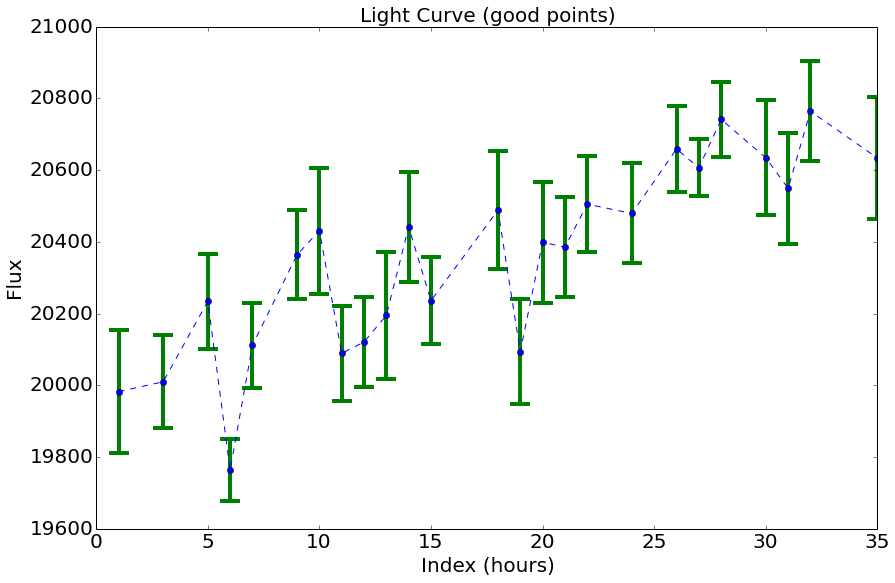

In [110]:
plt.figure(figsize=(14,9))
plt.errorbar(idxnew,fluxnew,yerr=fluxerrnew,fmt='o--',ecolor='g',capsize=10,capthick=4,elinewidth=4)
plt.xlabel('Index (hours)'); plt.ylabel('Flux'); plt.title('Light Curve (good points)')
plt.legend()

#### Constant fit to the good points

In [111]:
%%capture
fitnew = FitModel(idxnew,fluxnew,fluxerrnew,ConstantModel)
fitnew.fit()

chisqnew = fitnew.statval
dofnew = len(idxnew) - 1
prob_highnew = chisq_exceeds_prob(chisqnew,dofnew)

In [113]:
print 'Probability of being random is {0:.2e}'.format(prob_highnew)

Probability of being random is 1.04e-15


Remains extremely tiny, which is expected, as the points have a ascending trend, which leads us to (b)...

### (b) Fitting a linear model

In [130]:
%%capture
fitlin = FitModel(idxnew,fluxnew,fluxerrnew,LinearModel)
fitlin.fit()

chisqlin = fitlin.statval
doflin = len(idxnew) - 2
prob_highlin = chisq_exceeds_prob(chisqlin,doflin)

In [131]:
print 'Probability of being random is {0:.2f}'.format(prob_highlin)

Probability of being random is 0.11


This is greater than some commonly quoted value like p > 0.01. So acceptable

#### Quantities

In [133]:
bestlin_const = fitlin.par_vals['a0']
bestlin_slope = fitlin.par_vals['a1']
#- 68%
fitlin.uncert(nsigma=1.0)
con_conf68_low,con_conf68_high = fitlin.par_err['a0']
slp_conf68_low,slp_conf68_high = fitlin.par_err['a1']

Hesse errors : 
{'a1': 2.6965812473101547, 'a0': 53.88820786640117}
Parameter errors :
{'a1': (-2.6965811845911567, 2.6965811851811234), 'a0': (-53.88820675024177, 53.88820676357966)}


In [134]:
print '   (i) Best fit chi-square    : {0:.2f}'.format(chisqlin)
print '  (ii) Probility being random : {0:.2f}'.format(prob_highlin)
print ' (iii) Is this fit acceptable?: YES'
print '  (iv) Best-fit constant (68%): {0:.2f} +/- {1:.2f}'.format(bestlin_const,con_conf68_high)
print '   (v) Best-fit slope    (68%): {0:.2f} +/- {1:.2f}'.format(bestlin_slope,slp_conf68_high)

   (i) Best fit chi-square    : 31.40
  (ii) Probility being random : 0.11
 (iii) Is this fit acceptable?: YES
  (iv) Best-fit constant (68%): 19886.34 +/- 53.89
   (v) Best-fit slope    (68%): 26.15 +/- 2.70


### (d) $\chi^2$ values of constant / linear model
To justify the usage of "one more parameter" on top of the original (constant) model, we need the F-value:

In [136]:
## recall that "new" and "lin" suffices are for "constant" and "linear" model respectively
F = f_test_exceeds_prob(chisqnew,dofnew,chisqlin,doflin)
print 'Probability of randomly getting higher F = {0:.2e}'.format(F)

Probability of randomly getting higher F = 2.27e-08


Ultra small. Justified. Period.

### (e) Can we choose model based on $\chi^2$ value alone?

**No**. $\chi^2$ depends on DOF and thus comparison is not as intuitive. In this context, the exponential model would be intrinsically distinct from previous models. Therefore, even F-tests would not work. One would have to resort to other frameworks like the Bayesian model evalutaion: evidence ratio.

---
## 4. Object Masses via Two Methods
_**Background**: Two sets of estimates of masses from two methods: Method 1/2 has high precision/accuracy but low or unknown accuracy/precision. The two measurements are believed to relate to each other via a simple linear relation._

Data first!

In [138]:
arch3path = '/afs/ir.stanford.edu/class/physics100/workdir/g2/Jason/statsHW/prob4.cat'
arch3data = pyfits.open(arch3path)

ar3dat = arch3data[1].data
ar3hdr = arch3data[1].header

print 'data'
print '-'*80
print ar3dat
print '\n'+'+-'*40
print 'header'
print '-'*80
print ar3hdr

data
--------------------------------------------------------------------------------
[( 0.27566108,  0.36375734,  0.06469982)
 ( 0.26951507,  0.42593902,  0.07054693)
 ( 1.15350807,  1.12010872,  0.13534831)
 ( 0.75722337,  0.67364526,  0.08048925)
 ( 0.65618223,  0.69876885,  0.07230861)
 ( 0.65842915,  0.67139757,  0.09354449)
 ( 0.28608075,  0.16907084,  0.02872248)
 ( 0.44674364,  0.40888342,  0.05037337)
 ( 0.80471563,  0.6655938 ,  0.07235424)
 ( 0.23203248,  0.12705056,  0.03628242)
 ( 0.20176442,  0.18449672,  0.07093907)
 ( 0.65451765,  0.83410043,  0.08836427)
 ( 1.270684  ,  1.21136761,  0.13336501)
 ( 0.87845331,  0.97293174,  0.12050859)
 ( 0.58051515,  0.53804612,  0.06050472)
 ( 0.77177906,  0.82799822,  0.08792038)
 ( 0.94284189,  0.95519644,  0.11313849)
 ( 0.8699277 ,  0.81199253,  0.09216802)
 ( 1.2688477 ,  1.39336812,  0.18413423)
 ( 0.21594454,  0.2189938 ,  0.04154595)
 ( 0.40583968,  0.31895873,  0.04347638)
 ( 0.3513512 ,  0.14466454,  0.03750432)
 ( 0.4954974

Note: Method 1 has no error.

### (a) What values for the parameters of the "linear relation" should I get if the two methods are correct?
Correctness means the two must "match", which in turn implies a unity slope and zero intercept.

### (b) (c) Best-fit linear relation

In [139]:
mass_1 = ar3dat['mass1']
mass_2 = ar3dat['mass2']
mass_2err = ar3dat['mass2err']

nbrofobs_m = len(mass_1)

Before fitting, let's take a look first

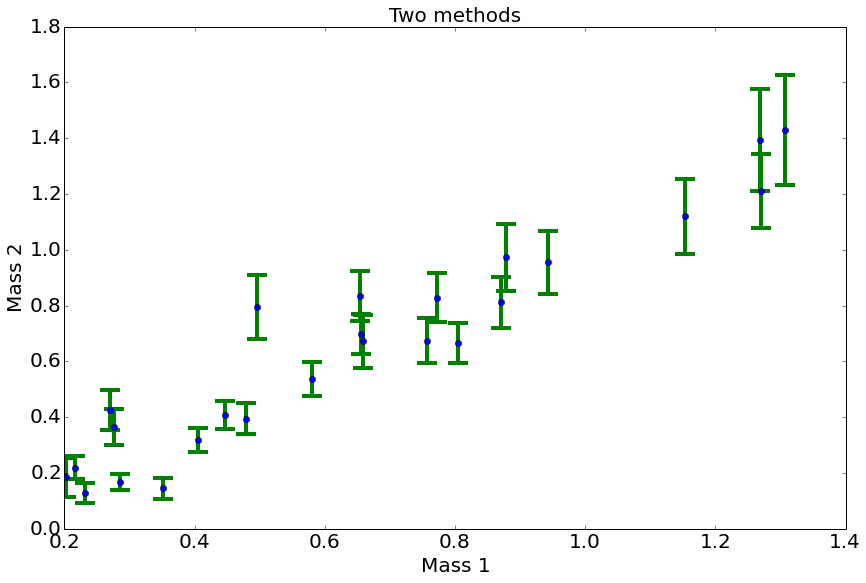

In [146]:
plt.figure(figsize=(14,9))
plt.errorbar(mass_1,mass_2,yerr=mass_2err,fmt='o',ecolor='g',capsize=10,capthick=4,elinewidth=4)
plt.xlabel('Mass 1'); plt.ylabel('Mass 2'); plt.title('Two methods')

#### Fit

In [147]:
%%capture
fitmlin = FitModel(mass_1,mass_2,mass_2err,LinearModel)
fitmlin.fit()

chisqmlin = fitmlin.statval
dofmlin = nbrofobs_m - 2
prob_mlin = chisq_exceeds_prob(chisqmlin,dofmlin)

#### Quantities

In [150]:
%%capture
bestmlin_const = fitmlin.par_vals['a0']
bestmlin_slope = fitmlin.par_vals['a1']
#- 68%
fitmlin.uncert(nsigma=1.0)
con_conf68m_low,con_conf68m_high = fitmlin.par_err['a0']
slp_conf68m_low,slp_conf68m_high = fitmlin.par_err['a1']

In [154]:
print '   (i) Best fit chi-square    : {0:.2f}'.format(chisqmlin)
print '  (ii) Probility being random : {0:.2e}'.format(prob_mlin)
print ' (iii) Is this fit acceptable?: YES'
print '  (iv) Best-fit constant (68%): {0:.2f} +/- {1:.2f}'.format(bestmlin_const,con_conf68m_high)
print '   (v) Best-fit slope    (68%): {0:.2f} +/- {1:.2f}'.format(bestmlin_slope,slp_conf68m_high)

   (i) Best fit chi-square    : 62.52
  (ii) Probility being random : 1.64e-05
 (iii) Is this fit acceptable?: YES
  (iv) Best-fit constant (68%): -0.10 +/- 0.03
   (v) Best-fit slope    (68%): 1.10 +/- 0.05


Why is (ii) so small? Let's overlay the best-fit line on the data

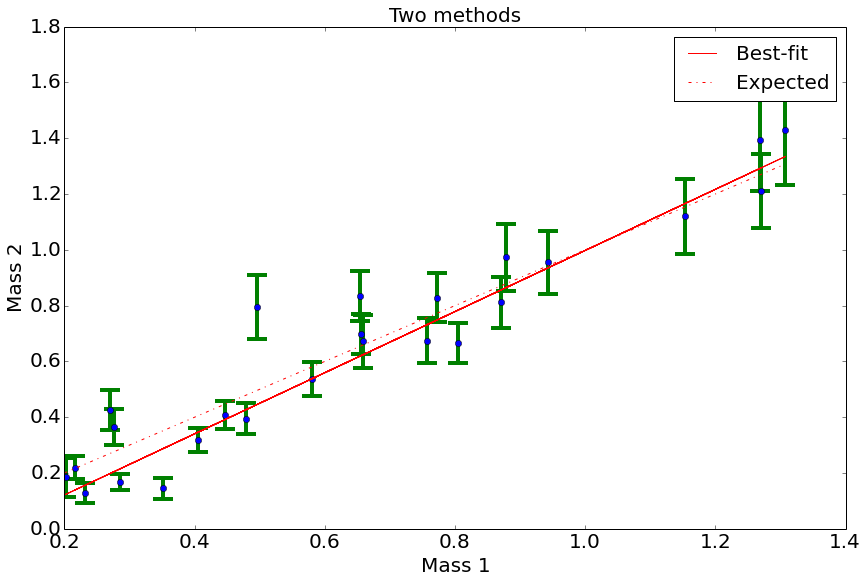

In [157]:
plt.figure(figsize=(14,9))
plt.errorbar(mass_1,mass_2,yerr=mass_2err,fmt='o',ecolor='g',capsize=10,capthick=4,elinewidth=4)
plt.plot(mass_1,mass_1*bestmlin_slope+bestmlin_const,'r-',label='Best-fit')
plt.plot([0.2,1.3],[0.2,1.3],'r-.',label='Expected')
plt.xlabel('Mass 1'); plt.ylabel('Mass 2'); plt.title('Two methods')
plt.legend()

### (d) How can we improve the fit?
The plot above seems to provide no obvious hints except for the fact that several measurements from method 2 are "too high". However, this time we don't have the flags to do warranted removal of data points (we can't remove them after we've seen the result!). Furthermore, fitting more complicated polynomials or exponentials would not possibly help either. On the other hand, from the "expected" line (slope=1, intercept=0) one might suspect that all the measurements from method 2 are indeed biased somehow (or the other way around, for method1). Of course, the best way and the first to do is to put back the error bars for method 1, which should not be zero anyway.